import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
# to work with dataframes


# to split data into train and test
import seaborn as sns
# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# to ignore warnings
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)
from sklearn.ensemble import BaggingRegressor

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv("Cardiac.csv")
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


In [60]:
df["UnderRisk"] = df["UnderRisk"].replace("no", 0)
df["UnderRisk"] = df["UnderRisk"].replace("yes", 1)
df["UnderRisk"].value_counts()

0    699
1    190
Name: UnderRisk, dtype: int64

In [61]:
X = df.drop("UnderRisk", axis=1)
Y = df["UnderRisk"]

In [62]:
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8, random_state=1, stratify=Y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,Y_temp, test_size=0.25, random_state=1, stratify = Y_temp)


In [63]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [64]:
print(X_train.shape,
X_test.shape,
X_valid.shape)


(711, 13) (178, 13) (533, 13)


In [65]:
lg = LogisticRegression(random_state=1)
model = lg.fit(X_train, y_train)

In [80]:
# Copy some functions from the example code
def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)
    pred_thres = y_pred > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors)
    pred_thres = y_pred > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")




Training performance:
   Accuracy    Recall  Precision        F1
0   0.78481  0.006579   0.333333  0.012903


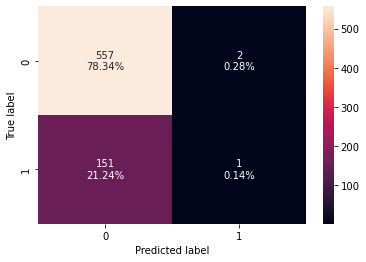

In [67]:
confused = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("\n\n\nTraining performance:")
print(log_reg_model_train_perf)

In [68]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)




Training performance:
   Accuracy    Recall  Precision        F1
0  0.667263  0.767442   0.639344  0.697561


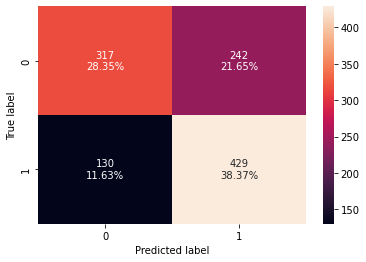

In [69]:
lg = LogisticRegression(random_state=1)
model = lg.fit(X_train_over, y_train_over)
confused = confusion_matrix_sklearn_with_threshold(lg, X_train_over, y_train_over)
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train_over, y_train_over
)

print("\n\n\nTraining performance:")
print(log_reg_model_train_perf)

In [108]:
ridge = LogisticRegression(random_state=1, solver="saga", penalty="l1")
ridge.fit(X_train_over,y_train_over)
ridge_predict = ridge.predict(X_train_over)
print(precision_score(y_train_over, ridge_predict))

0.6340425531914894


In [94]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='recall')
print(np.average(results))

0.7566280566280567
